<a href="https://colab.research.google.com/github/Camicb/Statistics-w-python-Coursera/blob/master/Univariate__Analysis__Using__NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [ ]:
#Renombrar y calcular frecuencias totales
da["DMDMARTL"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated ", 5: "Never married", 6: "Living with partner", 77: "Refused"})
print('1) Marital Status for all people') 
print(da.DMDMARTL.value_counts())
da["RIAGENDR"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

print('2)Marital Status for women')
w=da.loc[da["RIAGENDR"] == "Female", "DMDMARTL"] #selecciono  mujeres
print(w.value_counts())

print('3)Marital Status for men')
m=da.loc[da["RIAGENDR"] == "Male", "DMDMARTL"] #selecciono  hombres
print(m.value_counts())

age= da[(da["RIDAGEYR"] >= 30) & (da["RIDAGEYR"] <= 40)]
print('4) Marital Status for all people by age 30-40') 
print(age.DMDMARTL.value_counts())

print('5)Marital Status for women by age 30-40')
W=age.loc[age["RIAGENDR"] == "Female", "DMDMARTL"] #selecciono  mujeres
print(W.value_counts())

print('6)Marital Status for men by age 30-40')
M=age.loc[age["RIAGENDR"] == "Male", "DMDMARTL"] #selecciono  hombres
print(M.value_counts())


__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.
__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.
__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [ ]:
age1= da[(da["RIDAGEYR"] >= 10) & (da["RIDAGEYR"] <= 20)]
print('1) Marital Status for women by age 0-10')
age1["DMDMARTL"] = age1.DMDMARTL.fillna("Missing")
W1=age1.loc[age1["RIAGENDR"] == "Female", "DMDMARTL"] 
x1=W1.value_counts()
print(x1/x1.sum())

age2= da[(da["RIDAGEYR"] >= 21) & (da["RIDAGEYR"] <= 30)]
print('2) Marital Status for women by age 21-30')
W2=age2.loc[age2["RIAGENDR"] == "Female", "DMDMARTL"] 
x2=W2.value_counts()
print(x2/x2.sum())

age3= da[(da["RIDAGEYR"] >= 31) & (da["RIDAGEYR"] <= 40)]
print('3) Marital Status for women by age 31-40')
W3=age3.loc[age3["RIAGENDR"] == "Female", "DMDMARTL"] 
x3=W3.value_counts()
print(x3/x3.sum())

age4= da[(da["RIDAGEYR"] >= 41) & (da["RIDAGEYR"] <= 50)]
print('4) Marital Status for women by age 41-50')
W4=age4.loc[age4["RIAGENDR"] == "Female", "DMDMARTL"] 
x4=W4.value_counts()
print(x4/x4.sum())

age5= da[(da["RIDAGEYR"] >= 51) & (da["RIDAGEYR"] <= 60)]
print('5) Marital Status for women by age 51-60')
W5=age5.loc[age5["RIAGENDR"] == "Female", "DMDMARTL"] 
x5=W5.value_counts()
print(x5/x5.sum())

age6= da[(da["RIDAGEYR"] >= 61) & (da["RIDAGEYR"] <= 70)]
print('6)Marital Status for women by age 61-70')
W6=age6.loc[age6["RIAGENDR"] == "Female", "DMDMARTL"] 
x6=W6.value_counts()
print(x6/x6.sum())

age7= da[(da["RIDAGEYR"] >= 71) & (da["RIDAGEYR"] <= 80)]
print('7) Marital Status for women by age 71-80')
W7=age7.loc[age7["RIAGENDR"] == "Female", "DMDMARTL"] 
x7=W7.value_counts()
print(x7/x7.sum())

#age8= da[(da["RIDAGEYR"] >= 81) & (da["RIDAGEYR"] <= 90)]#vaía igual q la de 0-10 años
#print('8) Marital Status for women by age 81-90')
#W8=age8.loc[age8["RIAGENDR"] == "Female", "DMDMARTL"] 
#x8=W8.value_counts()
#print(x8/x8.sum())

In [161]:
#Codigo del professor
import pandas as pd

da = pd.read_csv("nhanes_2015_2016.csv")

# recode marital status and gender so that they're treated as categorical
da['DMDMARTLx'] = da.DMDMARTL.replace({1: 'Married', 2: 'Widowed', 3: 'Divorced', 4: 'Separated', 5: 'Never Married', 6: 'Living with Partner', 77: 'Refused', 99: 'Don\'t Know'})
da['RIAGENDRx'] = da.RIAGENDR.replace({1: 'Male', 2: 'Female'})

# subset the data to include only females
da = da.where(da.RIAGENDRx == 'Female')

# cut age into bands no wider than 10 years
da['agegrp'] = pd.cut(da.RIDAGEYR, [20, 30, 40, 50, 60, 70, 80])

# Eliminate rare/missing values
dx = da.loc[~da.DMDMARTLx.isin(["Don't know", "Missing"]), :]  

# group marital status by age group band
dx = dx.groupby(["agegrp"])["DMDMARTLx"]

# obtain the counts for marital status within each age group band
dx = dx.value_counts()

dx = dx.unstack() # Restructure the results from 'long' to 'wide'
dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print(dx.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

DMDMARTLx  Divorced  Living with Partner  Married  Never Married  Refused  Separated  Widowed
agegrp                                                                                       
(20, 30]      0.021                0.206    0.305          0.446      NaN      0.021      NaN
(30, 40]      0.091                0.120    0.544          0.205      NaN      0.036    0.004
(40, 50]      0.137                0.074    0.574          0.125      NaN      0.066    0.024
(50, 60]      0.177                0.068    0.547          0.089    0.002      0.057    0.060
(60, 70]      0.193                0.043    0.481          0.086      NaN      0.050    0.147
(70, 80]      0.144                0.007    0.317          0.051      NaN      0.020    0.461


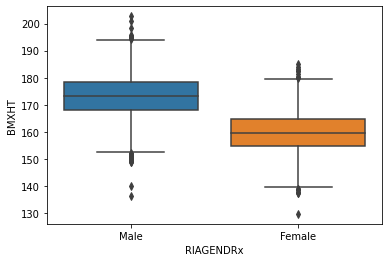

In [163]:
#code del profe
# boxplots for males and females

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

da = pd.read_csv("nhanes_2015_2016.csv")

da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

sns.boxplot(x="RIAGENDRx", y="BMXHT", data=da)

__Q2a.__ Comment on the trends that you see in this series of marginal distributions. __Q2b.__ Repeat the construction for males. __Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

In [ ]:
sns.distplot(da.BMXHT.dropna()).set_title('Histogram of heights')
plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)(distplot se va a actualizar con otros nombres pero en este ambiente no me deja cambiarlo) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small-->se va al porcino

In [ ]:
hist=da.BMXHT.dropna()
sns.distplot(hist, bins=100, kde=False)
plt.show()

In [ ]:
hist1=da.BMXHT.dropna()
sns.distplot(hist, bins=10, kde=False)
plt.show()

Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

In [ ]:
histw=da.loc[da["RIAGENDR"] == "Female", "BMXHT"] #selecciono mujeres
sns.distplot(histw).set_title('Histogram for Heights of women')
plt.show()

In [ ]:
histm=da.loc[da["RIAGENDR"] == "Male", "BMXHT"]#selecciono hombres
sns.distplot(histm).set_title('Histogram for Heights of men')
plt.show()

In [ ]:
sns.boxplot(x="BPXSY1", y="RIAGENDR", hue="RIAGENDR", data=da).set_title('Boxplots for heights of men and women')
plt.figure(figsize=(14, 7))

_Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

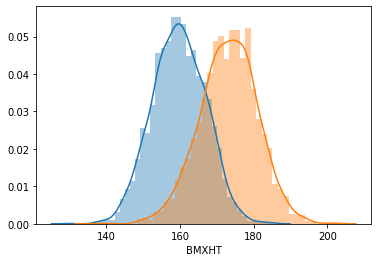

In [162]:
#Codigo del profe
# histograms for males and females

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

da = pd.read_csv("nhanes_2015_2016.csv")

da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
df = da.loc[da.RIAGENDRx.isin(["Female"]), :]
dm = da.loc[da.RIAGENDRx.isin(["Male"]), :]

sns.distplot(df.BMXHT.dropna())
sns.distplot(dm.BMXHT.dropna())

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

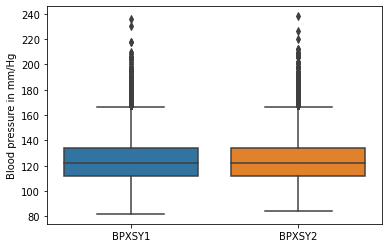

In [160]:
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?--> *Above we saw that the second blood pressure reading on a subject tended on average to be slightly lower than the first measurement. This difference was less than 1 mm/Hg, so is not visible in the “marginal”
distributions shown.*

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

__Q5a.__ Comment on any major differences among the distributions.

In [ ]:
# Univariate Practice Q5a

# imports
import pandas as pd

# read the data
da = pd.read_csv("nhanes_2015_2016.csv")

# recode the educational variable
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "A:<9", 2: "B:9-11", 3: "C:HS/GED", 4: "D:Some college/AA", 5: "E:College", 
                                       7: "F:Refused", 9: "G:Don't know"})

# obtain counts for each level of household size by the grouping variable
dx = da.groupby(["DMDEDUC2x"])["DMDHHSIZ"].value_counts()

# what datatype was returned?
#print(type(dx))

# what do the results look like?
#print(dx)

# restructure the results from 'long' to 'wide'
dx = dx.unstack() 

# what datatype was returned?
#print(type(dx))

# how did .unstack() change the results?
#print(dx)

# normalize within each stratum to get proportions that sum to 1
dx = dx.apply(lambda x: x/x.sum(), axis=1)

# print the results and format to three decimal points
print(dx.to_string(float_format="%.3f"))

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [173]:
# DEMO CODE FOR Q5b

# imports
import pandas as pd

# read the csv file
da = pd.read_csv("nhanes_2015_2016.csv")

# restrict ages 30 to 40
da["agegrp"]=pd.cut(da.RIDAGEYR,[30,40])

# recode gender variable
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

# recode educational variable
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "A:<9", 2: "B:9-11", 3: "C:HS/GED", 4: "D:Some college/AA", 5: "E:College", 
                                       7: "F:Refused", 9: "G:Don't know"})

# obtain descriptives for household size by grouping variables
dx = da.groupby(["agegrp","DMDEDUC2x","RIAGENDRx"])["DMDHHSIZ"].median().dropna()

# find the column names so that we can print median only
#print(dx.columns)

#print the median only
print(dx) 


agegrp    DMDEDUC2x          RIAGENDRx
(30, 40]  A:<9               Female       5.0
                             Male         5.0
          B:9-11             Female       5.0
                             Male         5.0
          C:HS/GED           Female       5.0
                             Male         4.0
          D:Some college/AA  Female       4.0
                             Male         4.0
          E:College          Female       4.0
                             Male         3.0
Name: DMDHHSIZ, dtype: float64


## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [ ]:
#code del profe
# imports
import pandas as pd

# read csv dataset into dataframe
da = pd.read_csv("nhanes_2015_2016.csv")

# create new dataframes for Males and Females
dam = da.where(da.RIAGENDR == 1)
daf = da.where(da.RIAGENDR == 2)

# get max mean for age across every combo of SDMVPSU and SDMVSTRA
agemax = dam.groupby(['SDMVPSU', 'SDMVSTRA'])["RIDAGEYR"].mean().max() #The groupby 
#line is obtaining the means for RIDAGEYR for every combination of and SDMVPSU 
#and SDMVSTRA, and then finding the max or min of all of those individual groupby means.

# get min mean for age across every combo of SDMVPSU and SDMVSTRA
agemin = dam.groupby(['SDMVPSU', 'SDMVSTRA'])["RIDAGEYR"].mean().min()

# print max, min and ratio
print("Male agemax:", agemax)

print("Male agemin:", agemin)

print("Male ageratio:", agemax/agemin)

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [170]:


DAm = da.where(da.RIAGENDR == 1)
DAf = da.where(da.RIAGENDR == 2)

# get max mean for age across every combo of SDMVPSU and SDMVSTRA
p75max= DAf.groupby(['SDMVPSU', 'SDMVSTRA'])["RIDAGEYR"].quantile(0.75).max()
p75min= DAf.groupby(['SDMVPSU', 'SDMVSTRA'])["RIDAGEYR"].quantile(0.75).min()


# get min mean for age across every combo of SDMVPSU and SDMVSTRA
p25max = DAf.groupby(['SDMVPSU', 'SDMVSTRA'])["RIDAGEYR"].quantile(0.25).max()
p25min= DAf.groupby(['SDMVPSU', 'SDMVSTRA'])["RIDAGEYR"].quantile(0.25).min()

IQRmax=p75max-p25min
IQRmin=p75min-p25max

# print max, min and ratio
print("Female iqrmax:", IQRmax)

print("Female iqrmin:", IQRmin)

print("Female iqr ratio:", IQRmax/IQRmin)

Female iqrmax: 50.0
Female iqrmin: 10.5
Female iqr ratio: 4.761904761904762


__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.